# Mice Gut Data Analyisis

In [1]:
import pandas as pd
import re
import os
import sys
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from mice_inspection_utils import *
#from Forward_Regression_Method.regression import *

imput_subj_paths = [f"Data/raw/total.full.rn.RA.total_OTU_table.mouse{i+1}.ovr0.0p.csv" for i in range(0, 8)]
output_subj_paths = [f"Data/by_mouse/mouse_{i+1}.csv" for i in range(0, 8)]
metadata_path = "Data/raw/OTU_table.csv"
mi = Mice_Inspection(ip = imput_subj_paths, op = output_subj_paths, mdp = metadata_path)

/var/folders/vk/kftm8379123bsmwrdp8l0xr00000gn/T/ipykernel_2183/4000233178.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Raw OTU data inspection

### Species time-series plots

In [3]:
df = pd.read_csv("Data/by_species/mean:250_sorted.csv")
df.rename(columns={"Unnamed: 0": "rank"}, inplace=True)
print(df.columns)
# Format for latex table "$rank$ & $species$  & $global mean$ //"
with open("Data/by_species/mean:100_sorted_latex.txt", "w") as f:
    for i in range(0, 100):
        rank = df["rank"][i] +1
        species = df["species"][i]
        mean = df["global_mean"][i]
        median = df["global_median"][i]
        f.write(f"${rank}$ & {species} & ${mean:.2f}$ & ${median:.2f}$ \\\\" + "\n")

FileNotFoundError: [Errno 2] No such file or directory: 'Data/by_species/mean:250_sorted.csv'

In [ ]:
species_list = mi.sort_species(sorting_criterion='mean', write_csv=False)
mi.plot_species(species_list= species_list, save_fig = True)

saved as Inspection_Outputs/1260_species_8_subjects_page_1.pdf
saved as Inspection_Outputs/1260_species_8_subjects_page_2.pdf
saved as Inspection_Outputs/1260_species_8_subjects_page_3.pdf
saved as Inspection_Outputs/1260_species_8_subjects_page_4.pdf
saved as Inspection_Outputs/1260_species_8_subjects_page_5.pdf
saved as Inspection_Outputs/1260_species_8_subjects_page_6.pdf
saved as Inspection_Outputs/1260_species_8_subjects_page_7.pdf
saved as Inspection_Outputs/1260_species_8_subjects_page_8.pdf
saved as Inspection_Outputs/1260_species_8_subjects_page_9.pdf
saved as Inspection_Outputs/1260_species_8_subjects_page_10.pdf
saved as Inspection_Outputs/1260_species_8_subjects_page_11.pdf
saved as Inspection_Outputs/1260_species_8_subjects_page_12.pdf
saved as Inspection_Outputs/1260_species_8_subjects_page_13.pdf
saved as Inspection_Outputs/1260_species_8_subjects_page_14.pdf
saved as Inspection_Outputs/1260_species_8_subjects_page_15.pdf
saved as Inspection_Outputs/1260_species_8_subjec

In [ ]:
from pypdf import PdfWriter

merger = PdfWriter()
files = os.listdir('Inspection_Outputs/Time_Series/ALL_species_by_mean')
# Get the complete path of the files
files = ['Inspection_Outputs/Time_Series/ALL_species_by_mean/' + i for i in files]
# Sort the files by page number
files.sort(key=lambda f: int(re.sub('\D', '', f)))



for pdf in files:
    merger.append(pdf)

merger.write("merged_bymean.pdf")
merger.close()


<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\D'
/var/folders/vk/kftm8379123bsmwrdp8l0xr00000gn/T/ipykernel_825/2990875097.py:8: SyntaxWarning: invalid escape sequence '\D'
  files.sort(key=lambda f: int(re.sub('\D', '', f)))


### Frequency distribution

Excluded species: 1105


/var/folders/vk/kftm8379123bsmwrdp8l0xr00000gn/T/ipykernel_2006/3511307156.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, power_law(x, *popt), 'r-', label='ax^b: a=%5.3f, b=%5.3f' % tuple(popt), color= 'red')


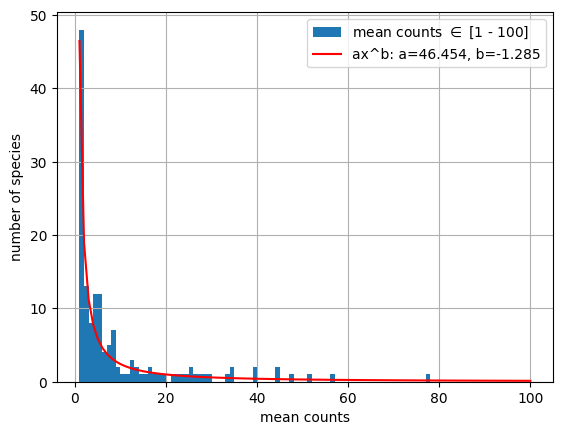

In [ ]:
# fit with power law distribution
from scipy.stats import powerlaw
# fit with lognormal distribution
from scipy.stats import lognorm
import numpy as np
from scipy.optimize import curve_fit
# fit power law
def power_law(x, a, b):
    return a * x ** b

# fit lognormal
def log_normal(x, a, b, c):
    return a * lognorm.pdf(x, b, c)

# Plot the frequency distribution of counts
xmin = 1
xmax = 100
df = pd.read_csv("Data/by_species/mean:None_sorted.csv")
# counts number of rows with global mean < xmin
excluded_species = len(df[df["global_mean"] < xmin])
print(f"Excluded species: {excluded_species}")
df = df[df["global_mean"] > xmin]
df = df[df["global_mean"] < xmax]
bins = (xmax - xmin) // 1
# plot histogram
plt.hist(df["global_mean"], bins=bins, range=(xmin, xmax), label= r'mean counts $\in$ [1 - 100]')

# fit the data
x = np.linspace(xmin, xmax, bins)
y = np.histogram(df["global_mean"], bins=bins, range=(xmin, xmax))[0]
popt, pcov = curve_fit(power_law, x, y)
plt.plot(x, power_law(x, *popt), 'r-', label='ax^b: a=%5.3f, b=%5.3f' % tuple(popt), color= 'red')
plt.legend()

plt.xlabel('mean counts')
plt.ylabel('number of species')
# set yaxis limits
#plt.ylim(0, 10)
plt.grid()
plt.savefig("Inspection_Outputs/frequency_distribution_temp.pdf")

In [ ]:
sel_species_median = mi.select_species(max_rank= 20, by = 'median', sort='byrank')
sel_species_mean = mi.select_species(max_rank= 20, by = 'mean', sort='byrank')
sel_species_difference = set(sel_species_mean) - set(sel_species_median)
sel_species_difference = list(sel_species_difference)  # Convert back to list if needed
print(f"not in median: {sel_species_difference}")
sel_species_difference = set(sel_species_median) - set(sel_species_mean)
sel_species_difference = list(sel_species_difference)  # Convert back to list if needed
print(f"not in mean: {sel_species_difference}")

#mi.plot_species(species_list= sel_species[20:30], start_idx = 21, subjects= [(s + 1) for s in range(mi.subjects)], interpolate='none', save_fig= True)

not in median: ['Streptococcus AY020', 'Vibrio cholerae', '[Eubacterium] biforme', 'Candidatus Arthromitus sp. SFB-mouse', 'Streptococcus sp. B1']
not in mean: ['Prevotella sp. oral taxon 317', 'Candidatus Prevotella conceptionensis']


### Rank - Abundance distribution

In [16]:
n = 1
df = mi.mice_df[n]
sampled_species = [len(mi.mice_df[n]) for n in range(8)]
sampled_species

[626, 590, 690, 574, 679, 602, 640, 597]

threshold rank= 100, mouse 1, cum frequency= 0.9491290322580647
threshold rank= 100, mouse 2, cum frequency= 0.964814606741573
threshold rank= 100, mouse 3, cum frequency= 0.9559449838187704
threshold rank= 100, mouse 4, cum frequency= 0.960680067001675
threshold rank= 100, mouse 5, cum frequency= 0.9539444444444443
threshold rank= 100, mouse 6, cum frequency= 0.9506853582554518
threshold rank= 100, mouse 7, cum frequency= 0.9565041876046902
threshold rank= 100, mouse 8, cum frequency= 0.9522443280977311


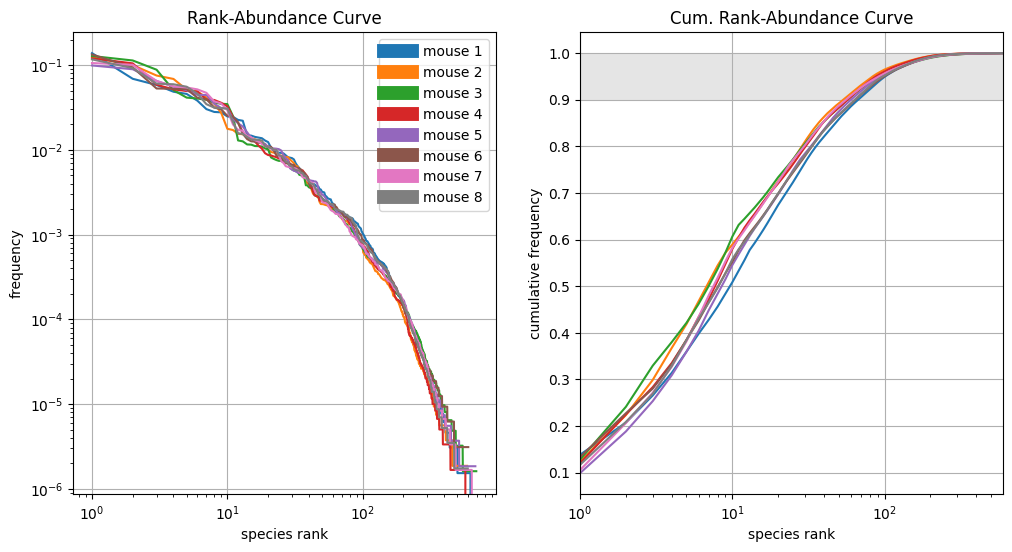

In [14]:
max_rank = 100
out_path = os.path.join("Inspection_Outputs", "RAD.png")
mi.mice_df = mi.get_mice_df(sort_by= 'mean')


fig, ax = plt.subplots( nrows=1, ncols= 2,  figsize = (12, 6))

for n in range(mi.subjects):
    df = mi.mice_df[n]
    x = np.arange(1, len(df)+1) # ranks
    y = df['mean_counts'] / mi.sample_size # frequencies
    y_cum = [np.sum(y[0:(rank)]) for rank in x] # cum frequencies
    # -----------------------------------------------------#
    threshold_cum = np.sum(y[0:(max_rank)])
    print(f"threshold rank= {max_rank}, mouse {n+1}, cum frequency= {threshold_cum}")
    # -----------------------------------------------------#
    ax[0].plot(x, y, label = f'mouse {n+1}')
    ax[1].plot(x, y_cum, label = f'mouse {n+1}')
    ax[1].set_xlim(1, len(df))

ax[0].set_title("Rank-Abundance Curve", fontsize = 'large')
ax[0].set_xlabel("species rank")
ax[0].set_ylabel("frequency")
ax[0].grid(which= "major", axis = "x")
ax[0].grid(which= "major", axis = "y")
legend = ax[0].legend()
for line in legend.get_lines():
    line.set_linewidth(10)
ax[0].set_xscale("log")
ax[0].set_yscale("log")

ax[1].set_title("Cum. Rank-Abundance Curve", fontsize = 'large')
ax[1].set_xlabel("species rank")
ax[1].set_ylabel("cumulative frequency")
ax[1].set_yticks(np.arange(0, 1.1, 0.1))
ax[1].grid(which= "major", axis = "x")
ax[1].grid(which= "both", axis = "y")
ax[1].set_xscale("log")
#ax[1].set_yscale("log")
ax[1].axhspan(0.9, 1, facecolor='gray', alpha=0.2)
plt.savefig(out_path)


### Rad with taxonomic classification

In [ ]:
species_df = mi.sort_species()
species_df.head()

In [ ]:

fig, axs = plt.subplots(nrows= 1, ncols = 2)

# mean counts histo
x = np.log10(species_df[species_df["global_mean"] > 1e-14]["global_mean"])
N = len(x)
counts, bins = np.histogram(x, bins= 50)
estimated_relative_variations = np.sqrt(counts)/counts
estimated_relative_variations # check if reasonable, otherwise change bin numbers


axs[0].bar(x = bins[:-1], height = counts, align = 'edge',
         width= 0.7*(bins[1]- bins[0]), yerr = np.sqrt(counts), alpha = 0.5)
#axs[0].set_xscale("log")
ticks = np.arange(-3, +7, 2)
axs[0].set_xticks(ticks)
axs[0].set_xticklabels([f"10e{i}" for i in ticks])
axs[0].set_yscale("log")
axs[0].set_xlabel("global mean counts")
axs[0].set_ylabel("number of species")

plt.subplots_adjust(wspace = 0.5)


# median counts histo
x = species_df["global_median"]
N = len(x)
counts, bins = np.histogram(x, bins= 100)
estimated_relative_variations = np.sqrt(counts)/counts
estimated_relative_variations # check if reasonable, otherwise change bin numbers

axs[1].bar(x = bins[:-1], height = counts, align = 'edge',
         width= 0.7*(bins[1]- bins[0]), yerr = np.sqrt(counts), alpha = 0.5)
axs[1].set_xscale("log")
axs[1].set_yscale("log")
axs[1].set_xlabel("global median counts")
axs[1].set_ylabel("number of species")


In [ ]:
phylumns = np.unique(species_df["Phylum"])
phylumns = ['Bacteroidetes', 'Firmicutes', 'Actinobacteria', 'Proteobacteria']
colors = ["blue", "orange", "green", "red"]

phyl_to_col_dict = {phylumns[i]: colors[i] for i in range(len(phylumns))}

In [ ]:
max_rank = 20
out_path = os.path.join("Outputs","Inspection", "RAD_aggregated.pdf")


# TODO improve clarity of graphs


fig, ax = plt.subplots( nrows=1, ncols= 2,  figsize = (12, 6))

for i, row in species_df.iterrows():

    #x = np.arange(1, len(df)+1)
    y = row['global_mean'] / mi.sample_size 
    y_cum = np.sum(species_df['global_mean'][0:i]) / mi.sample_size

    #threshold_cum = np.sum(y[0:(max_rank)])
    #print(f"threshold rank= {max_rank}, mouse {n+1}, cum frequency= {threshold_cum}")

    if row["Phylum"] in phyl_to_col_dict.keys():
        col = phyl_to_col_dict[row["Phylum"]]
    else:
        col = "grey"

    ax[0].scatter(i+1, y, color = col)
    ax[1].scatter(i+1, y_cum, color = col)

ax[1].set_xlim(1, len(species_df))
ax[0].set_title("RAD (ranking by mean)", fontsize = 'large')
ax[0].set_xlabel("rank")
ax[0].set_ylabel("frequency")
ax[0].grid(which= "both")
legend = ax[0].legend()
for line in legend.get_lines():
    line.set_linewidth(10)
ax[0].set_xscale("log")
ax[0].set_yscale("log")

ax[1].set_title("Cumulative RAD (ranking by mean)", fontsize = 'large')
ax[1].set_xlabel("rank")
ax[1].set_ylabel("cumulative frequency")
ax[1].grid(which= "both")
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].axhspan(0.9, 1, facecolor='gray', alpha=0.2)
#plt.savefig(out_path)

### Stacked bar plots

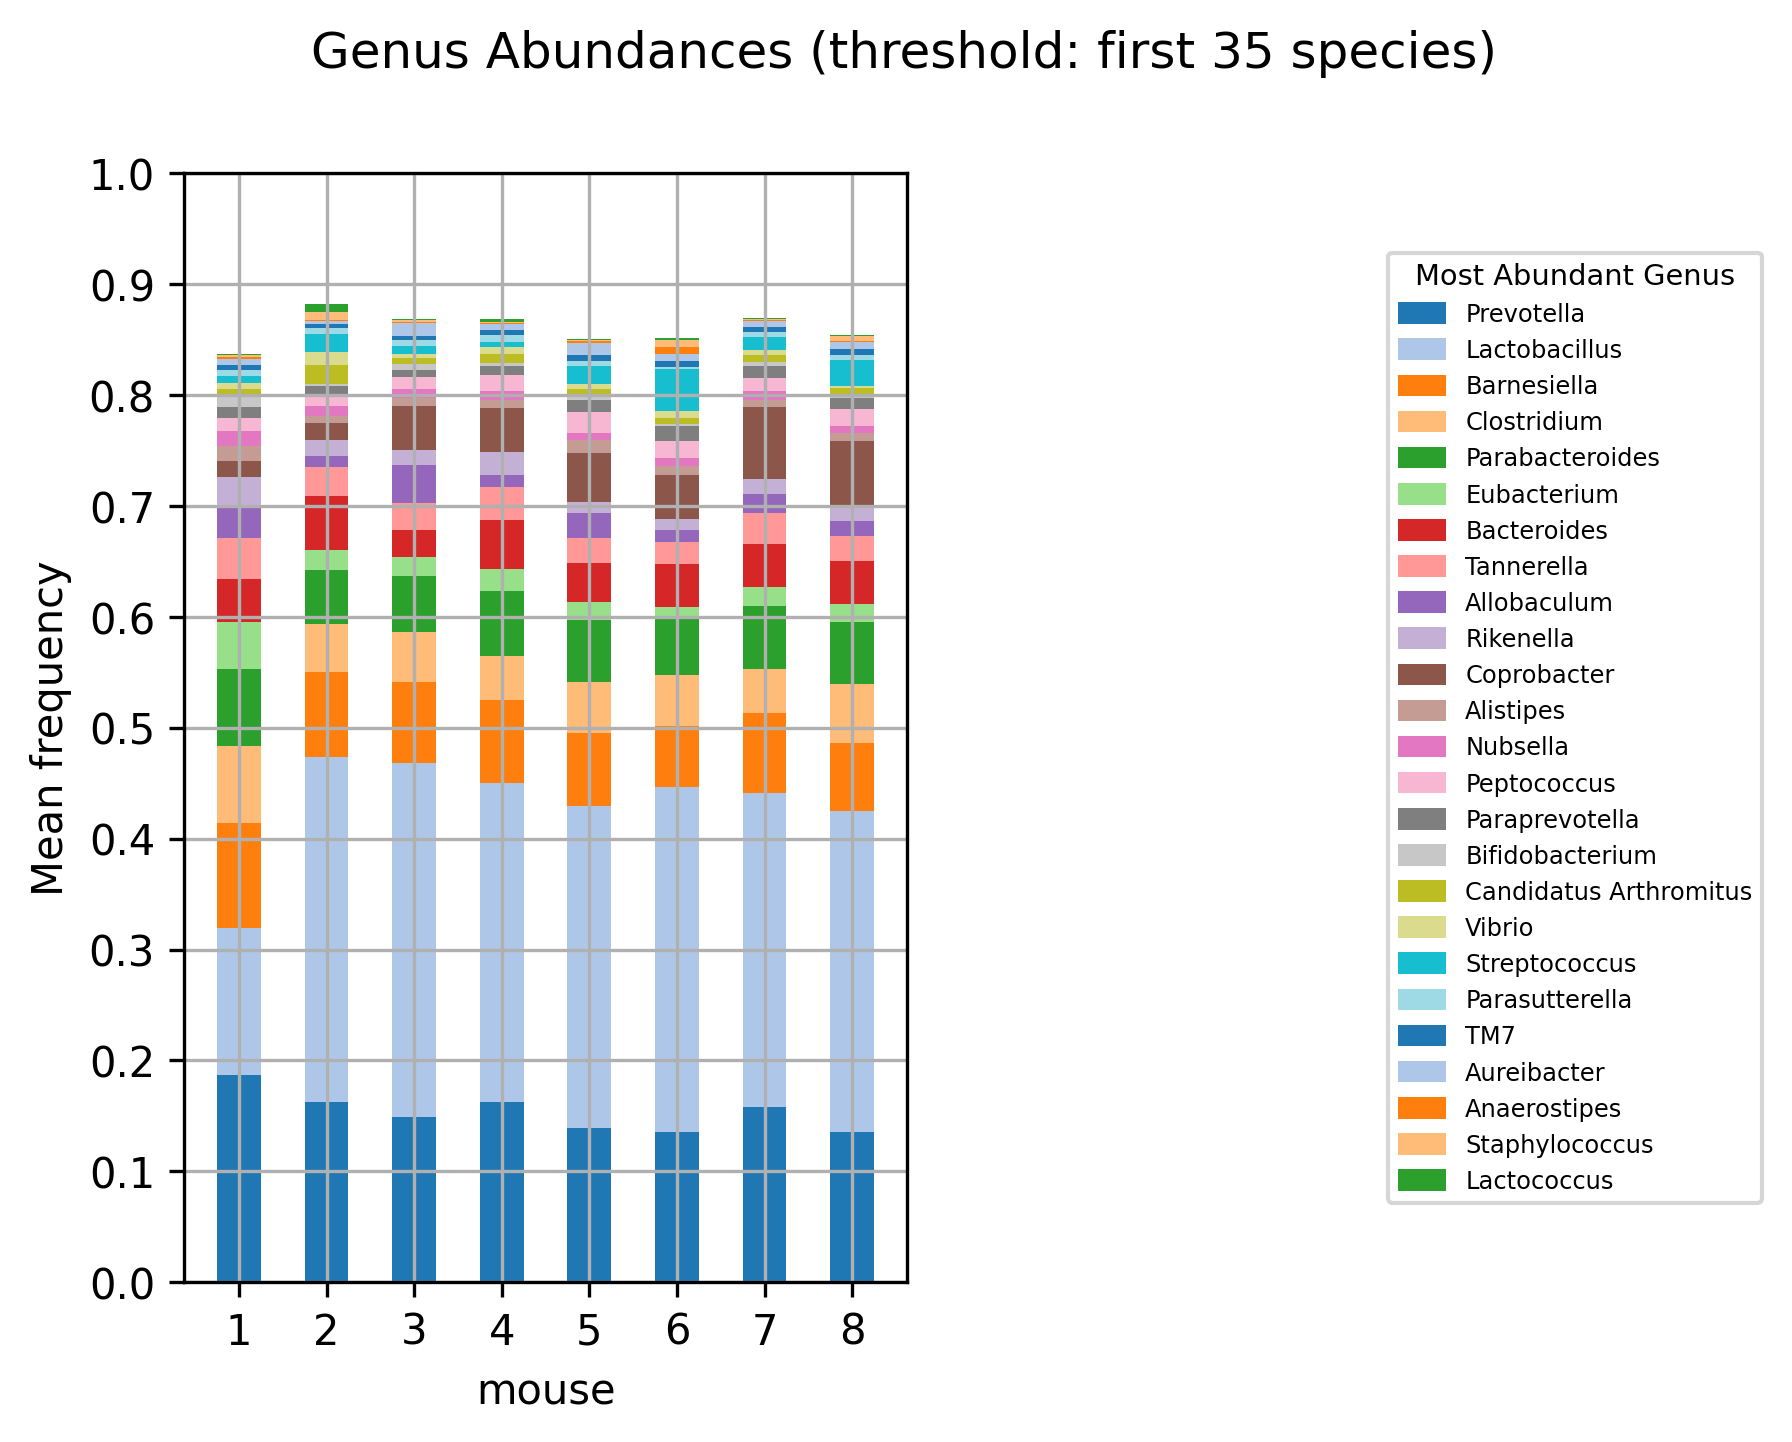

In [ ]:
mi.make_stacked_bar_plot(max_rank= 35, category= 'Genus', by= 'mean')

### Species thresholding (besed on percepntage of sample coverage)

In [ ]:
print("Thresholding based on MEAN frequency")

y_cum = np.array([np.sum(species_df['global_mean'][0:i]) / mi.sample_size for i in range(len(species_df))])
for desired_coverage in [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]:
    index = np.where(y_cum >= desired_coverage)[0][0] 
    print(desired_coverage, index + 1)

print("------------------- \n")


### Autocorrelation analysis

In [ ]:
# TODO what is the statistical uncertainty associated to my estimate of the autocorrelation function ACF(T) ?
# There should be some error, because the series is not infinite, therefore, smaller lags get a number of samples
# that is bigger. (the ACF at lag T=2 is estimated over a number of samples that is bigger than the number of samples
# used to estimate lag=20).

slot = (100, 600) # consider subset of timeseries without the initial transient
species_to_examine = ["Aureibacter tunicatorum", "Candidatus Prevotella conceptionensis", "Vibrio cholerae"]

species = "Prevotella sp. Smarlab 121567"
#rank = 29 # species which we examine


df = pd.read_csv(f"Data/by_mouse/mouse_1.csv")

rank = df.index[df["species"] == species].tolist()[0] # find index of row containing "Vibrio cholerae"

times = df.columns[4:].to_numpy(dtype=int)
counts = df.iloc[rank, 4:].to_numpy(dtype=int)


initial_day = slot[0]
final_day = slot[1]
tuple = (np.where(times >= initial_day)[0][0], np.where(times <= final_day)[0][-1]) 


times = times[tuple[0]:tuple[1]]
counts = counts[tuple[0]:tuple[1]]
#counts = df.iloc[rank, 4:].to_numpy(dtype=int)

std = np.std(counts)
mean = np.mean(counts)


data = []
for lag in range(0, 20):
    sum = 0
    n = 0
    for i, time in enumerate(times):
        for j in range(i, len(times)):
            if times[j] == time + lag:
                n += 1
                sum += (counts[i] - mean) * (counts[j] - mean)
    pearson = sum /( n * (std ** 2))
    data.append({'lag': lag, 'pearson': pearson})

results = pd.DataFrame(data)
#results.to_csv("Inspection_Outputs/prova_ACF.csv")


fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10,8))
plt.subplots_adjust(hspace = 0.3)
ax1.plot(times, counts, label = f"{df.iloc[rank, 1]}", linewidth = 2) #, color = colors(rank % 10))
ax1.scatter(times, counts, s= 10)#, color = colors(rank % 10))
ax1.axhline(y= mean)#, color = colors(rank % 10))
ax1.fill_between(x=times, y1=mean - std, y2=mean + std, color = "lightblue")#, color=colors(rank % 10), alpha=0.5)
ax1.legend(title = "species:",
                loc= "upper right")
ax1.set_xlim(min(times), max(times))
#ax1.set_xticks([t for i, t in enumerate(times) if i % 20 == 0])
ax1.grid()
ax1.set_xlabel("day")
ax1.set_ylabel("absolute counts")
ax2.bar(results['lag'], results['pearson'])#, color=colors(rank % 10))
ax2.set_xlabel("lag (days)")
ax2.set_ylabel("autocorrelation")

#plt.savefig(f"Inspection_Outputs/ACF_mouse_1_species_{species}.pdf")

## Distribution of time between measures

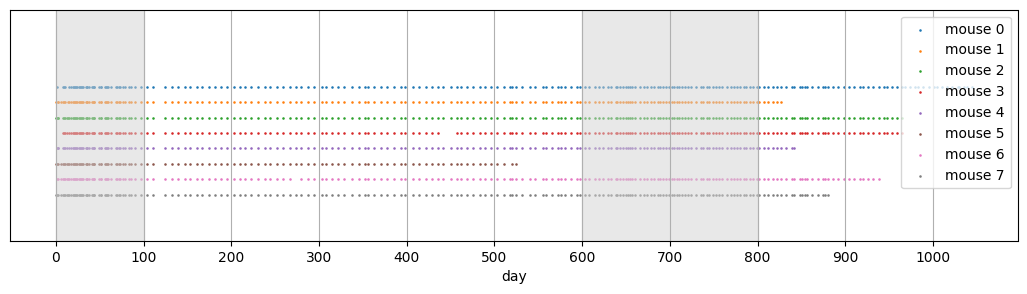

In [19]:
fig, ax = plt.subplots(figsize = (13, 3))

for i in range(8):
    df = mi.mice_df[i]
    days = df.columns[4:].to_numpy()

    ax.scatter(days, np.ones(len(days)) - i* 0.1, s = 0.7, label = f"mouse {i}")
ax.legend()
ax.set_xticks(np.arange(0, 1100, 100))
ax.set_yticks([])
ax.set_ylabel("") 
ax.set_xlabel("day")
ax.grid()
ax.set_ylim(0, 1.5)
ax.fill_between(x = np.linspace(0, 100, 100), y1=  np.zeros(100), y2= 1.5*np.ones(100), color='lightgrey', alpha=0.5)
ax.fill_between(x = np.linspace(600, 800, 100), y1=  np.zeros(100), y2= 1.5*np.ones(100), color='lightgrey', alpha=0.5)

mean interval between measures during day 0 to 100:  2.1794871794871793
mean interval between measures during day 100 to 600:  6.9
mean interval between measures during day 600 to 1044:  4.363636363636363


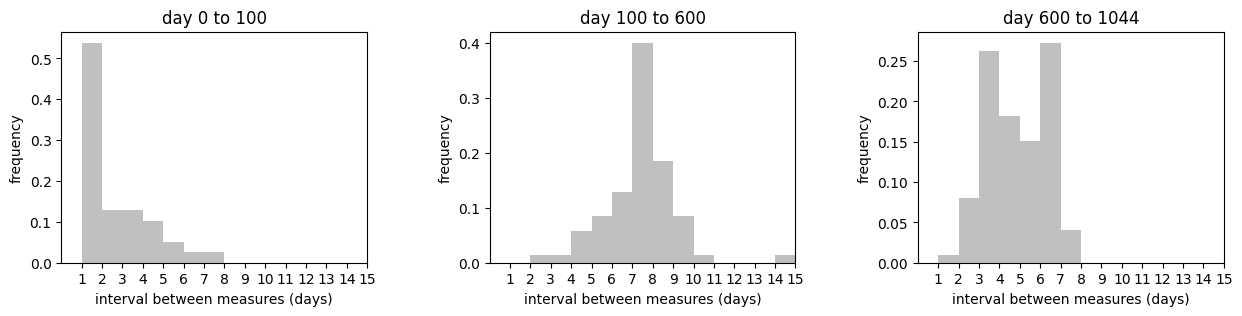

In [20]:
# get the lifespan of mice
path = f"Data/by_mouse/mouse_1_transposed.csv" # lives the longest
df = pd.read_csv(path)
lifespan = df.iloc[-1]["day"] 
days =  df.dropna()["day"].to_numpy() 


time_slots = [(0,100), (100, 600), (600, days[-1])]

fig, axs = plt.subplots(nrows = 1, ncols = len(time_slots), figsize = (15,3))
plt.subplots_adjust(wspace = 0.4)

for i, slot in enumerate(time_slots):

    initial_day = slot[0]
    final_day = slot[1]
    tuple = (np.where(days >= initial_day)[0][0], np.where(days <= final_day)[0][-1]) 
    filtered_measure_days = days[tuple[0]:(tuple[1]-1)] 

    differences = [filtered_measure_days[i+1] - filtered_measure_days[i] for i in range(len(filtered_measure_days)-1)]  
    mean = np.mean(differences)
    print(f"mean interval between measures during day {initial_day} to {final_day}: ", mean)

    unique_values, counts = np.unique(differences, return_counts=True) 
    united_histo_data = (unique_values, counts.astype(float) / np.sum(counts)) 


    # finally, plot!
    axs[i].set_title(f"day {initial_day} to {final_day}")
    axs[i].set_xlabel("interval between measures (days)")
    axs[i].set_ylabel("frequency")
    axs[i].bar(united_histo_data[0], united_histo_data[1], align= "edge", width= 1, alpha = 0.5, color = "grey")
    axs[i].set_xlim(0, 10)
    axs[i].set_xticks(np.arange(1, 16, 1))

plt.savefig("Inspection_Outputs/frequency_of_measures.pdf")